# datetime 오브젝트 사용하기

In [1]:
# 날짜와 시간 처리

from datetime import datetime

In [2]:
# now(), today() : 현재 시간

now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2021-03-10 18:21:34.678605
2021-03-10 18:21:34.678605


In [4]:
# 직접 인자 전달하기
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2021-03-10 18:23:47.276707
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
# 시간계산 가능
diff1 = t1-t2

print(diff1)
print(type(diff1))

18696 days, 18:23:47.276707
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환하기

In [6]:
import pandas as pd
import os

ebola = pd.read_csv("../data/country_timeseries.csv")

In [7]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB
None


In [10]:
# to_datetime() : Date열을 datetime 오브젝트로 변환하기

ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

#### 시간 형식 지정자

In [12]:
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [13]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


# 시간 데이터를 잘라내고 싶어요

In [14]:
# strftime()

now = datetime.now()
print(now)

nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H:%M:%S')
print(nowTime)

nowDateTime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDateTime)

2021-03-10 18:56:21.184963
2021-03-10
18:56:21
2021-03-10 18:56:21


# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [15]:
# read_csv()에 parse_dates
ebola1 = pd.read_csv("../data/country_timeseries.csv", parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB
None


# datetime 오브젝트에서 날짜 정보 추출하기

In [16]:
# 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [17]:
# datetime 오브젝트의 year, month, day 속성 이용
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


# dt 접근자로 시간 데이터 정리하기

In [18]:
ebola = pd.read_csv("../data/country_timeseries.csv")
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [20]:
# dt 접근자 사용하지 않고 인덱스가 3인 년,월,일 데이터 추출하기
print(ebola[['Date', 'date_dt']].head())

print(ebola.date_dt[3].year)
print(ebola.date_dt[3].month)
print(ebola.date_dt[3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [21]:
# df 접근자 사용하기
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


# 에볼라 최초 발생일 계산해보기

In [22]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min())) # Timestamp는 Datetime 오브젝트와 호환되는 자료형임

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [24]:
# 에볼라의 진행 정도
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


# 파산한 은행의 개수 계산하기

In [26]:
# 파산한 은행 데이터
banks = pd.read_csv("../data/banklist.csv")
print(banks.head())
print(banks.info())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name    

In [27]:
# 문자열 데이터를 datetime 오브젝트로 변환하여 불러오기
banks = pd.read_csv("../data/banklist.csv", parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


In [28]:
# dt접근자와 quarter 속성 이용하여 분기 파악
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [29]:
# 연도별로 파산한 은행 수 파악
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [30]:
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

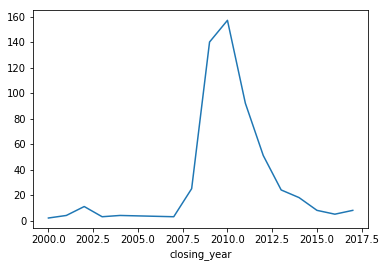

In [32]:
# 그래프 그려보기
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()

plt.show()



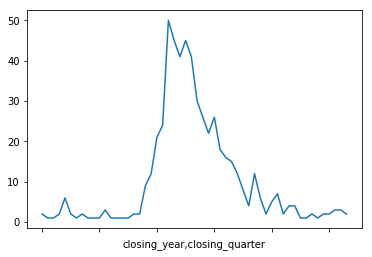

In [33]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

# 테슬라 주식 데이터로 시간 계산하기

In [34]:
# 테슬라 주식 데이터 내려받기
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas-datareader as pdr

# tesla에는 데이터 프레임 저장
# 하... api-key 받기 귀찮아서 패스


The following command must be run outside of the IPython shell:

    $ pip install pandas-datareader

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


# datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기

In [ ]:
# 얘도 테슬라 데이터임

# 시간 간격을 인덱스로 설정하여 데이터 추출하기

# 시간 범위 생성하여 인덱스로 지정하기

# 시간 범위의 주기 설정하기

# 에볼라 발병 시간 비교하기